<a href="https://colab.research.google.com/github/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/blob/main/DecisionTree_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ingest Data

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/erinmcmahon26/Company-Bankruptcy-Prediction-Kaggle/main/company_bankruptcy.csv')

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

### EDA

In [4]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.astype(np.float64))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

### Models

In [7]:
def model_metrics(model, xtest, ytest):
  y_pred = model.predict(xtest)
  cm = confusion_matrix(ytest, y_pred)
  print("Accuracy Score:", accuracy_score(ytest, y_pred))
  print("Report:", classification_report(ytest, y_pred))
  sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")

In [8]:
def param_selection(model, parameters, xtrain, ytrain):
  grid_search = GridSearchCV(model, parameters, scoring='accuracy', cv=5, n_jobs=1)
  results = grid_search.fit(xtrain, ytrain)
  print('Mean Accuracy: %.3f' % results.best_score_)
  print('Config: %s' % results.best_params_)

In [72]:
def acc_score(model, input_data, output_data):
    return np.mean(cross_val_score(model,input_data,output_data,cv=5,scoring="accuracy"))

#### Decisison Tree

Accuracy Score: 0.9501466275659824
Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.33      0.31      0.32        51

    accuracy                           0.95      1364
   macro avg       0.65      0.64      0.65      1364
weighted avg       0.95      0.95      0.95      1364



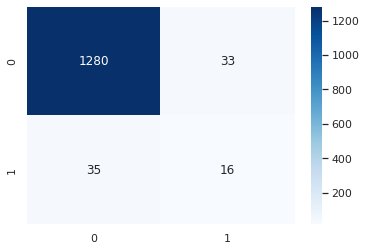

In [68]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

model_metrics(clf, x_test, y_test)
aucscore(clf, )

[Text(0.3932845744680851, 0.9722222222222222, 'X[89] <= -0.42\ngini = 0.06\nsamples = 5455\nvalue = [5286, 169]'),
 Text(0.1332916145181477, 0.9166666666666666, 'X[34] <= -0.069\ngini = 0.463\nsamples = 192\nvalue = [122, 70]'),
 Text(0.07509386733416772, 0.8611111111111112, 'X[8] <= -0.018\ngini = 0.465\nsamples = 49\nvalue = [18, 31]'),
 Text(0.04005006257822278, 0.8055555555555556, 'X[55] <= -1.72\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.02002503128911139, 0.75, 'X[24] <= 0.011\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.010012515644555695, 0.6944444444444444, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.030037546933667083, 0.6944444444444444, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.060075093867334166, 0.75, 'X[36] <= 0.836\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(0.05006257822277847, 0.6944444444444444, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.07008760951188986, 0.6944444444444444, 'X[69] <= 2.272\ngini = 0.128\nsa

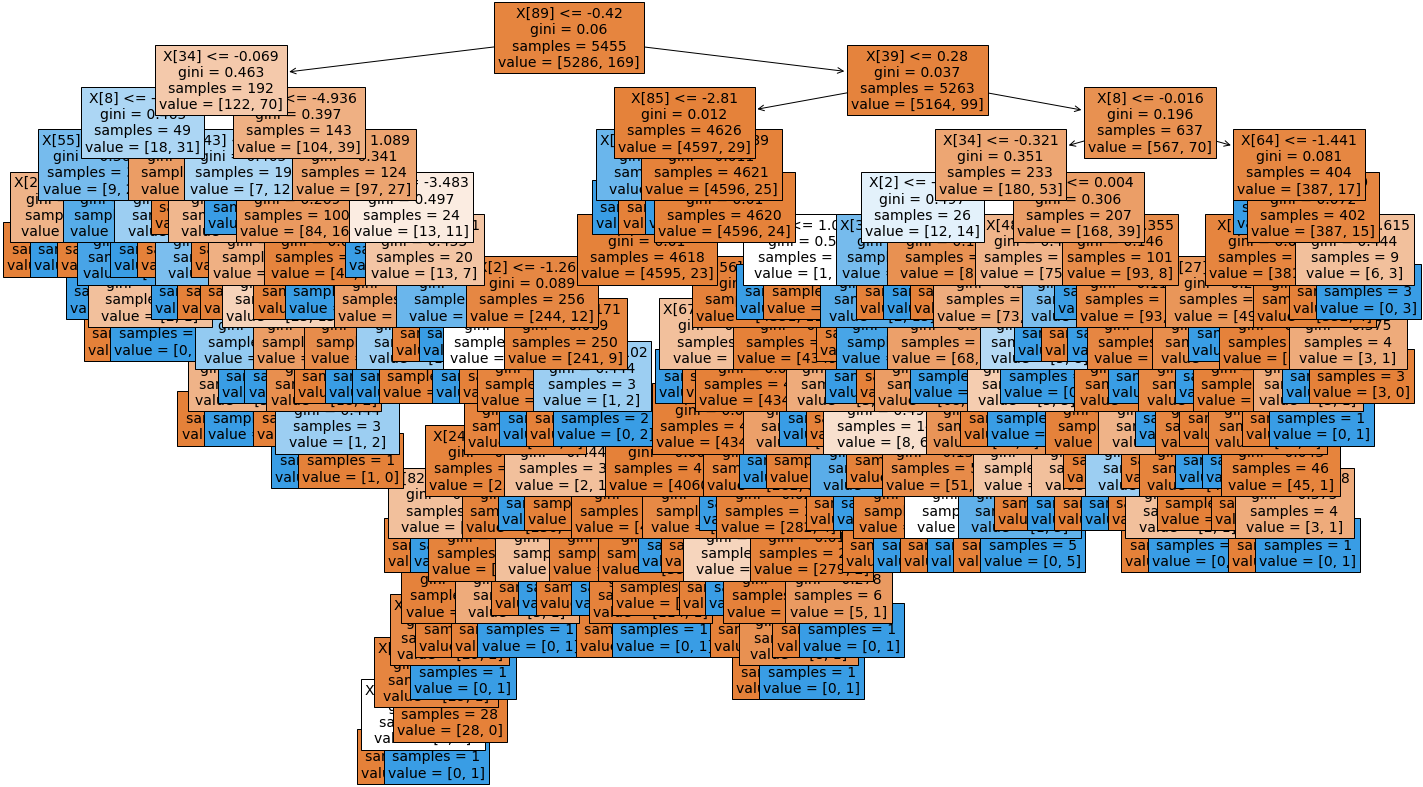

In [10]:
# can adjust min_impurity_decrease=# to decrease the 
from sklearn import tree
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)

Gini versus Entropy: gini basically measures the randomness of impurity (impurity increases with randomness) whereas entropy measures the uncertainty/randomness (more random, the higher the entropy). Most of the time these produce similar trees but while gini is the default and is often slightly faster, entropy can produce slightly more balanced trees when these two parameters prodcue a difference. 

Max_depth: signifies when the model stops splitting which helps regularize the model to reduce the risk of overfitting. Defualt = 0

Min_samples_leaf: the minimum number of samples a leaf node must have aka a split can only happen if it leaves the minimum about of samples per leaf in both of the resulting nodes. Defualt = 1

Min_samples_split: the minimum number of samples required to split an internal node, if the samle has less than this number it will become a leaf node. Defualt = 2

In [ ]:
#parameters = [{ 'criterion': ['gini', 'entropy'],
#                 'max_depth': range(1,10),
#                 'min_samples_split': range(1,10),
#                 'min_samples_leaf': range(1,5)}]

#param_selection(clf, parameters, x_train, y_train)

##### PCA for Feature Selection

In [12]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=95)
pca_test.fit(x_train)
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [13]:
pca_df.loc[pca_df['Cumulative Variance Ratio'] <= 0.95]

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.135075,0.135075
1,0.211178,0.076103
2,0.263300,0.052122
3,0.314298,0.050999
4,0.360514,0.046215
5,0.396804,0.036290
6,0.431068,0.034264
7,0.462566,0.031498
8,0.492711,0.030145
9,0.514602,0.021890


Using PCA, we have found that 95% of the variance in the data can be explained using 48 of the features when all columns are scaled using StandardSclaer. The other 47 features explain less than 5% of the variance so we can determine that we do not need them in our analysis. 

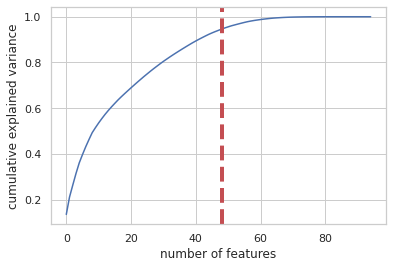

None

In [14]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of features')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=48, ymin=0, ymax=1)
display(plt.show())

In [15]:
pca = PCA(n_components=48)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

Accuracy Score: 0.9384164222873901
Report:               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1313
           1       0.23      0.27      0.25        51

    accuracy                           0.94      1364
   macro avg       0.60      0.62      0.61      1364
weighted avg       0.94      0.94      0.94      1364



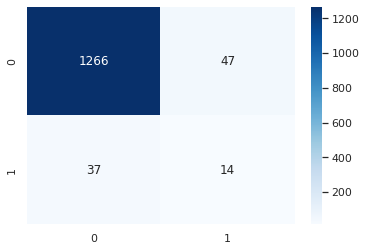

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train_pca,y_train)

model_metrics(clf, x_test_pca, y_test)

After performing feature selection using PCA, the model has decreased in overall accuracy by 0.01. This could suggest that....?

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [18]:
pca_test = PCA(n_components=95)
pca_test.fit(x_train)
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [19]:
pca_df.loc[pca_df['Cumulative Variance Ratio'] <= 0.95]

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.225539,0.225539
1,0.379579,0.154040
2,0.506533,0.126954
3,0.627895,0.121362
4,0.738743,0.110849
5,0.828990,0.090246
6,0.911913,0.082923


Without scaling the features, we see that only 6 columns represent 95% of the variance in the data set. This is in line with what the correlation plot produced, only a small amount of features were highly correlated to Bankrupt? and not very highly correlated. 

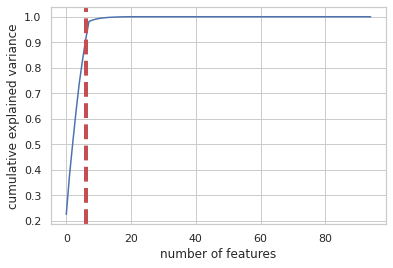

None

In [20]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of features')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=6, ymin=0, ymax=1)
display(plt.show())

In [21]:
pca = PCA(n_components=6)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

Accuracy Score: 0.9406158357771262
Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.14      0.12      0.13        51

    accuracy                           0.94      1364
   macro avg       0.55      0.55      0.55      1364
weighted avg       0.94      0.94      0.94      1364



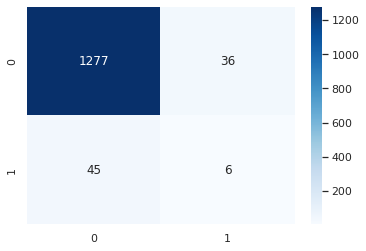

In [22]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train_pca,y_train)

model_metrics(clf, x_test_pca, y_test)

After running different features through the DT model, the models are showing very little change in their performance. The main metrics that change are the macro avg from the correlation matrix summary but the overall F1 accuracy is almost identical. This signifies that this model can still perform well in all 3 above scenarios. 

#### Extra Tree Classifier

Accuracy Score: 0.9640762463343109
Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.62      0.10      0.17        51

    accuracy                           0.96      1364
   macro avg       0.80      0.55      0.58      1364
weighted avg       0.95      0.96      0.95      1364



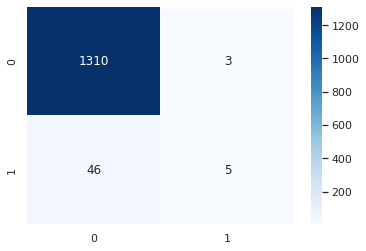

In [62]:
et = ExtraTreesClassifier()
et.fit(x_train, y_train)

model_metrics(et, x_test, y_test)

In [64]:
parameters4 = [{'n_estimators': range(50,126,25),
                'max_features': range(50,401,50),
                'min_samples_leaf': range(20,50,5),
                'min_samples_split': range(15,36,5)}]
param_selection(et, parameters4, x_train, y_train)

KeyboardInterrupt: ignored

Extra Trees trade more bias for lower variance as it uses random thresholds for each features rather than searching for the best possible threshold like Decision Tree's do. This model is performing as well, if not slightly better than the Decision Tree.

#### Random Forest

Accuracy Score: 0.968475073313783
Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.90      0.18      0.30        51

    accuracy                           0.97      1364
   macro avg       0.93      0.59      0.64      1364
weighted avg       0.97      0.97      0.96      1364



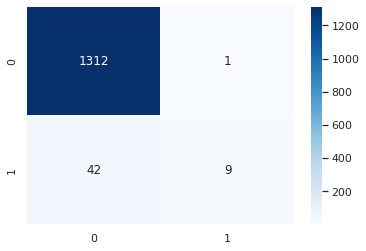

In [23]:
rfc = RandomForestClassifier(n_estimators=100, random_state = 777)
rfc.fit(x_train, y_train)

model_metrics(rfc, x_test, y_test)

In [58]:
df_features = df.drop(['Bankrupt?'], axis = 1)

In [60]:
feature_imp = pd.Series(rfc.feature_importances_,index=df_features.columns).sort_values(ascending=False)
feature_imp

 Net Value Growth Rate                  0.037139
 Net Income to Stockholder's Equity     0.028597
 Borrowing dependency                   0.026279
 Degree of Financial Leverage (DFL)     0.021253
 Interest-bearing debt interest rate    0.020539
                                          ...   
 Inventory/Current Liability            0.005750
 Revenue Per Share (Yuan ¥)             0.005594
 Tax rate (A)                           0.002492
 Liability-Assets Flag                  0.000117
 Net Income Flag                        0.000000
Length: 95, dtype: float64

Random Forests are able to measure feature importance by looking at how much nodes that use specific features, reduce impurity on average across all trees. Based on our dataset, the features we have to work with do not have a high importance to Bankrupt?

In [25]:
#parameters2 = [{'bootstrap': [True],
#               'max_depth': [10,15],
#               'max_features': [2, 3],
#               'min_samples_leaf': [3, 4, 5,6],
#               'min_samples_split': [3,4,5,6],
#               'n_estimators': [1150, 1200, 1250, 1300,1350]}]

#param_selection(rfc, parameters2, x_train, y_train)

KeyboardInterrupt: ignored

#### Gradiant Boosted Classifier

Accuracy Score: 0.968475073313783
Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.70      0.27      0.39        51

    accuracy                           0.97      1364
   macro avg       0.84      0.63      0.69      1364
weighted avg       0.96      0.97      0.96      1364



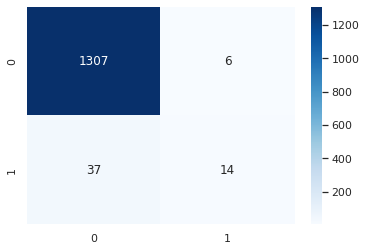

In [37]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

model_metrics(gb, x_test, y_test)

In [38]:
parameters3 = [{"n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
               "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
               "learning_rate": loguniform(0.01, 1),}]
param_selection(gb, parameters3, x_train, x_test)

NameError: ignored

Gradient Boosting is another ensemble method that sequentially adds predictors, each predictor correcting it's predessessor. Gradient boosting tries to fit the new predictor to the residual errors made by the previous predictors. 

### Conclusions

In [78]:
# for training data
Classifiers=["Decision Tree","Extra Trees Classifier","Random Forest Classifier","Gradiant Boosted"]
Acc=[acc_score(x, x_train, y_train) for x in [clf, et, rfc, gb]]
cols=["Classifier","Accuracy"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results

,Classifier,Accuracy
0,Decision Tree,0.957287
1,Extra Trees Classifier,0.970669
2,Random Forest Classifier,0.970852
3,Gradiant Boosted,0.968286


In [79]:
Classifiers=["Decision Tree","Extra Trees Classifier","Random Forest Classifier","Gradiant Boosted"]
Acc=[acc_score(x, x_test, y_test) for x in [clf, et, rfc, gb]]
cols=["Classifier","Accuracy"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results

,Classifier,Accuracy
0,Decision Tree,0.947945
1,Extra Trees Classifier,0.964808
2,Random Forest Classifier,0.960415
3,Gradiant Boosted,0.961883


** All detailed definitions are summarized from:

Geron, Aurelien. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. Sebastopol, CA: O'Reilly.